In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [2]:
df=pd.read_csv("Crop_recommendation_data.csv")
df

NameError: name 'pd' is not defined

<AxesSubplot:>

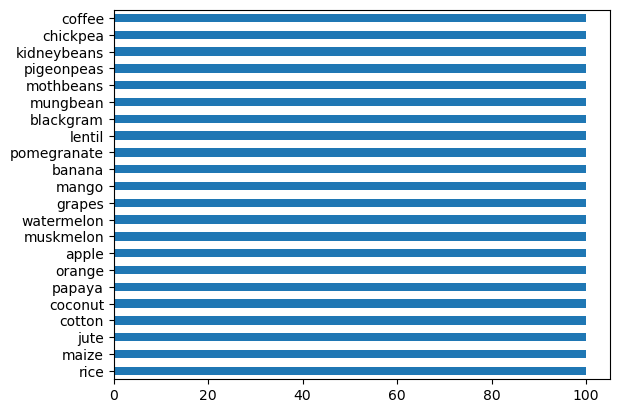

In [60]:
df['label'].value_counts().plot(kind="barh")

In [4]:
num_classes = df['label'].unique().shape[0]
classes = df['label'].unique()

print("Number of classes:", num_classes)
print("Classes:", classes)

Number of classes: 22
Classes: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [5]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
grouped = df.groupby("label")

<AxesSubplot:ylabel='Frequency'>

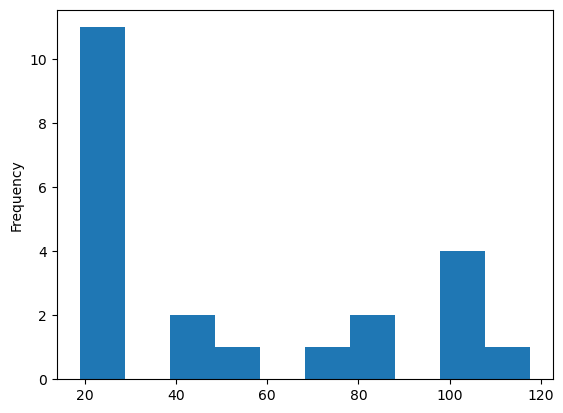

In [58]:
grouped.mean()["N"].plot(kind="barh")

<AxesSubplot:ylabel='label'>

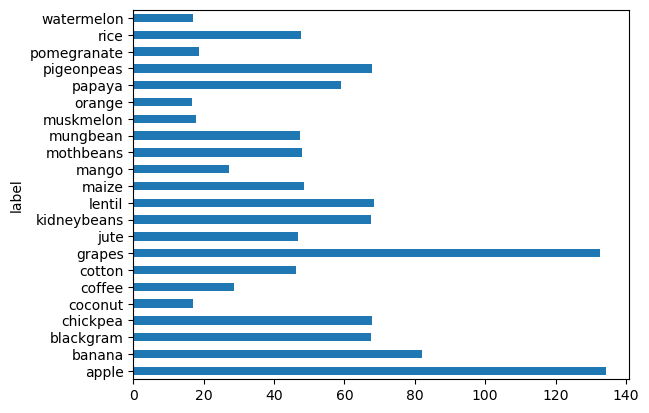

In [9]:
grouped.mean()["P"].plot(kind="barh")

<AxesSubplot:ylabel='label'>

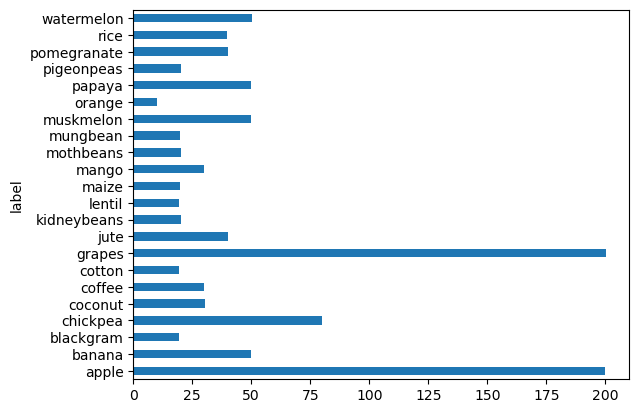

In [10]:
grouped.mean()["K"].plot(kind="barh")

<AxesSubplot:ylabel='label'>

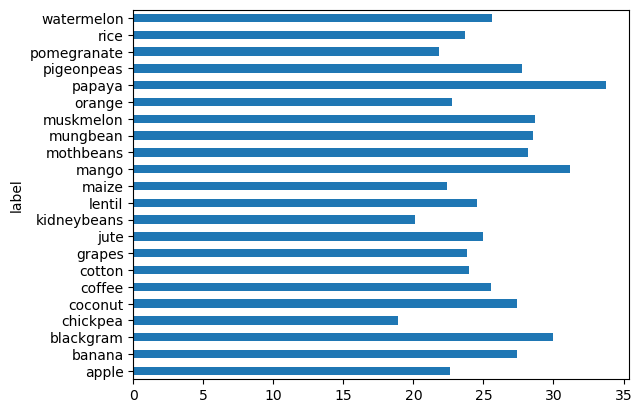

In [11]:
grouped.mean()["temperature"].plot(kind="barh")

<AxesSubplot:ylabel='label'>

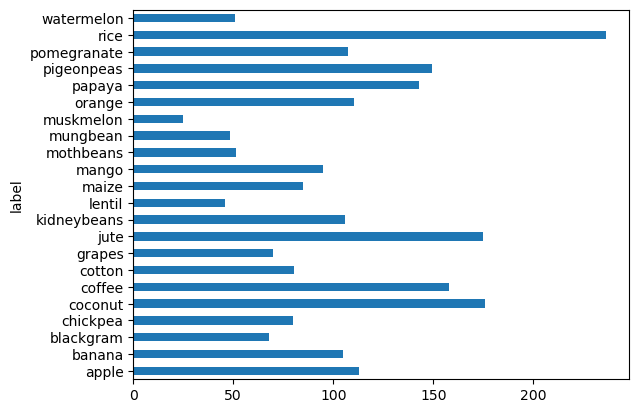

In [12]:
grouped.mean()["rainfall"].plot(kind="barh")

<AxesSubplot:ylabel='label'>

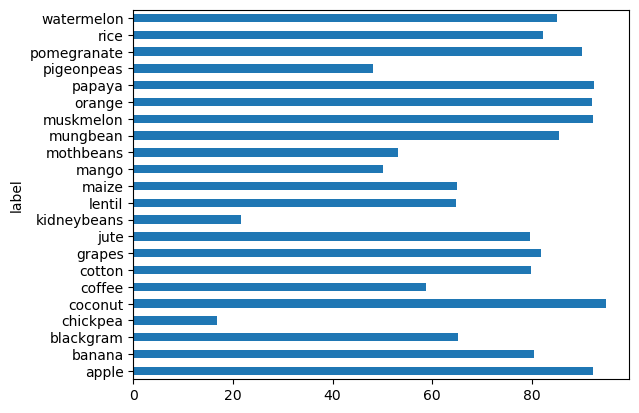

In [13]:
grouped.mean()["humidity"].plot(kind="barh")

<AxesSubplot:ylabel='label'>

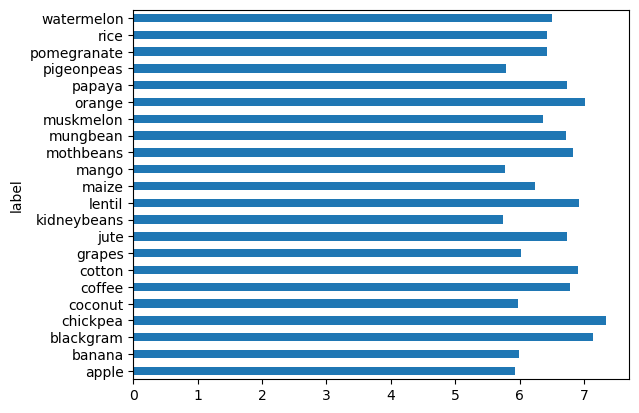

In [14]:
grouped.mean()["ph"].plot(kind="barh")

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

features = df[feature_columns]
labels = df[["label"]]

In [17]:
train_X, test_X, train_y, test_y = train_test_split(
    features, labels,
    test_size=0.3,
    random_state=42,
    stratify=labels
)

<AxesSubplot:ylabel='label'>

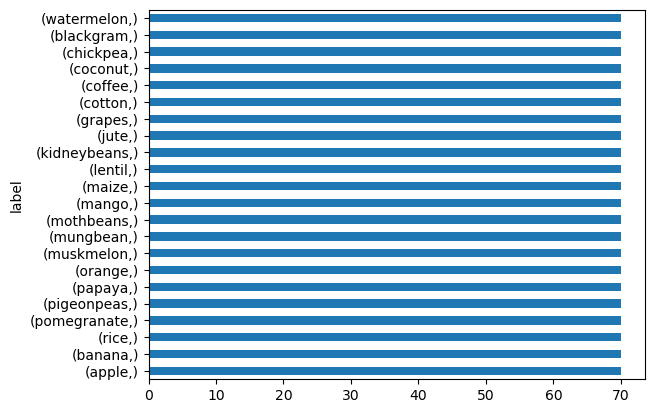

In [18]:
train_y.value_counts().plot(kind="barh") 


In [19]:
def evaluate(model):
    predictions = model.predict(test_X)
    acc = accuracy_score(predictions, test_y)
    return round(acc*100, 3)

# Decision Tree

In [28]:
decision_model = DecisionTreeClassifier(criterion='gini', 
                               max_depth = 12, 
                               random_state = 42)
decision_model.fit(train_X.values,train_y)

acc = evaluate(decision_model)
print(f"Decision Tree with Gini (accuracy): {acc}%")

Decision Tree with Gini (accuracy): 98.485%


C:\Users\DEEPAK\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Random Forest


In [37]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(train_X,train_y.values.ravel())

acc = evaluate(random_forest_model)
print(f"Random Forest (accuracy): {acc}%")

Random Forest (accuracy): 99.242%


# K-Nearest Neighbours 

In [47]:
knn_model = KNeighborsClassifier() # Defaults to 5 neighbors
knn_model.fit(train_X,(train_y))

acc = evaluate(knn_model)
print(f"K-Nearest Neighbors (accuracy): {acc}%")

K-Nearest Neighbors (accuracy): 97.879%


C:\Users\DEEPAK\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DEEPAK\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
sample = np.array([[90,	42,	43,	20.879744,	82.002744,	6.502985,	202.935536]])
decision_model.predict(sample)

array(['muskmelon'], dtype=object)